# Machine Learning Engineer Nanodegree
## Introduction and Foundations
## Project 0: Titanic Survival Exploration

In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In this introductory project, we will explore a subset of the RMS Titanic passenger manifest to determine which features best predict whether someone survived or did not survive. To complete this project, you will need to implement several conditional predictions and answer the questions below. Your project submission will be evaluated based on the completion of the code and your responses to the questions.
> **Tip:** Quoted sections like this will provide helpful instructions on how to navigate and use an iPython notebook. 

# Getting Started
To begin working with the RMS Titanic passenger data, we'll first need to `import` the functionality we need, and load our data into a `pandas` DataFrame.  
Run the code cell below to load our data and display the first few entries (passengers) for examination using the `.head()` function.
> **Tip:** You can run a code cell by clicking on the cell and using the keyboard shortcut **Shift + Enter** or **Shift + Return**. Alternatively, a code cell can be executed using the **Play** button in the hotbar after selecting it. Markdown cells (text cells like this one) can be edited by double-clicking, and saved using these same shortcuts. [Markdown](http://daringfireball.net/projects/markdown/syntax) allows you to write easy-to-read plain text that can be converted to HTML.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')

# RMS Titanic data visualization code 
from titanic_visualizations import survival_stats
from IPython.display import display
%matplotlib inline

# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

In [ ]:
full_data.shape

From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code cell below to remove **Survived** as a feature of the dataset and store it in `outcomes`.

In [ ]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head())

The very same sample of the RMS Titanic data now shows the **Survived** feature removed from the DataFrame. Note that `data` (the passenger data) and `outcomes` (the outcomes of survival) are now *paired*. That means for any passenger `data.loc[i]`, they have the survival outcome `outcome[i]`.

To measure the performance of our predictions, we need a metric to score our predictions against the true outcomes of survival. Since we are interested in how *accurate* our predictions are, we will calculate the proportion of passengers where our prediction of their survival is correct. Run the code cell below to create our `accuracy_score` function and test a prediction on the first five passengers.  

**Think:** *Out of the first five passengers, if we predict that all of them survived, what would you expect the accuracy of our predictions to be?*

In [ ]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print accuracy_score(outcomes[:5], predictions)

> **Tip:** If you save an iPython Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

# Making Predictions

If we were asked to make a prediction about any passenger aboard the RMS Titanic whom we knew nothing about, then the best prediction we could make would be that they did not survive. This is because we can assume that a majority of the passengers (more than 50%) did not survive the ship sinking.  
The `predictions_0` function below will always predict that a passenger did not survive.

In [ ]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

### Question 1
*Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?*  
**Hint:** Run the code cell below to see the accuracy of this prediction.

In [ ]:
print accuracy_score(outcomes, predictions)

**Answer:** *Predictions have an accuracy of 61.62%.*

***
Let's take a look at whether the feature **Sex** has any indication of survival rates among passengers using the `survival_stats` function. This function is defined in the `titanic_visualizations.py` Python script included with this project. The first two parameters passed to the function are the RMS Titanic data and passenger survival outcomes, respectively. The third parameter indicates which feature we want to plot survival statistics across.  
Run the code cell below to plot the survival outcomes of passengers based on their sex.

In [ ]:
survival_stats(data, outcomes, 'Sex')

Examining the survival statistics, a large majority of males did not survive the ship sinking. However, a majority of females *did* survive the ship sinking. Let's build on our previous prediction: If a passenger was female, then we will predict that they survived. Otherwise, we will predict the passenger did not survive.  
Fill in the missing code below so that the function will make this prediction.  
**Hint:** You can access the values of each feature for a passenger like a dictionary. For example, `passenger['Sex']` is the sex of the passenger.

In [ ]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

### Question 2
*How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive?*  
**Hint:** Run the code cell below to see the accuracy of this prediction.

In [9]:
print accuracy_score(outcomes, predictions)

**Answer**: *Predictions have an accuracy of 78.68%.*

***
Using just the **Sex** feature for each passenger, we are able to increase the accuracy of our predictions by a significant margin. Now, let's consider using an additional feature to see if we can further improve our predictions. For example, consider all of the male passengers aboard the RMS Titanic: Can we find a subset of those passengers that had a higher rate of survival? Let's start by looking at the **Age** of each male, by again using the `survival_stats` function. This time, we'll use a fourth parameter to filter out the data so that only passengers with the **Sex** 'male' will be included.  
Run the code cell below to plot the survival outcomes of male passengers based on their age.

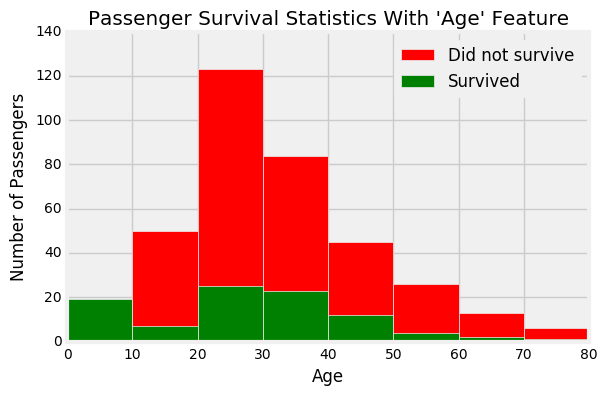

In [10]:
# Most men die, unless they are 10 years old or less
survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

Examining the survival statistics, the majority of males younger than 10 survived the ship sinking, whereas most males age 10 or older *did not survive* the ship sinking. Let's continue to build on our previous prediction: If a passenger was female, then we will predict they survive. If a passenger was male and younger than 10, then we will also predict they survive. Otherwise, we will predict they do not survive.  
Fill in the missing code below so that the function will make this prediction.  
**Hint:** You can start your implementation of this function using the prediction code you wrote earlier from `predictions_1`.

In [11]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            if passenger['Age'] < 10:
                predictions.append(1)
            else:
                predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)

### Question 3
*How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived?*  
**Hint:** Run the code cell below to see the accuracy of this prediction.

In [12]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 79.35%.


**Answer**: *Predictions have an accuracy of 79.35%.*

***
Adding the feature **Age** as a condition in conjunction with **Sex** improves the accuracy by a small margin more than with simply using the feature **Sex** alone. Now it's your turn: Find a series of features and conditions to split the data on to obtain an outcome prediction accuracy of at least 80%. This may require multiple features and multiple levels of conditional statements to succeed. You can use the same feature multiple times with different conditions.   
**Pclass**, **Sex**, **Age**, **SibSp**, and **Parch** are some suggested features to try.

Use the `survival_stats` function below to to examine various survival statistics.  
**Hint:** To use mulitple filter conditions, put each condition in the list passed as the last argument. Example: `["Sex == 'male'", "Age < 18"]`

After exploring the survival statistics visualization, fill in the missing code below so that the function will make your prediction.  
Make sure to keep track of the various features and conditions you tried before arriving at your final prediction model.  
**Hint:** You can start your implementation of this function using the prediction code you wrote earlier from `predictions_2`.

# Visualization of 3 features: Age, Sex and Pclass.

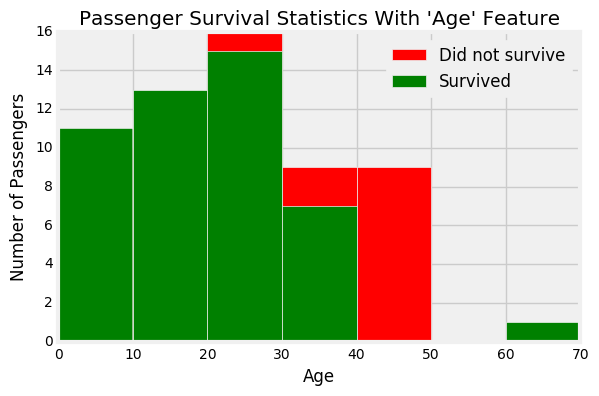

In [13]:
# Graph 1
# Women between the age of 40 and 50, in third class, all died. Some died between the age of 20 and 40, but not a big proportion
survival_stats(data, outcomes, 'Age', ["Sex == 'female'", "Pclass == 3"])

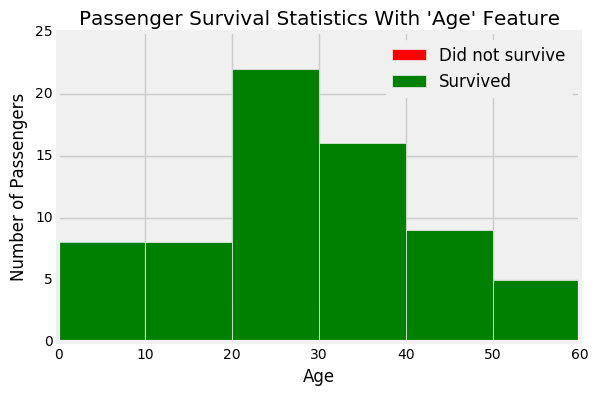

In [14]:
# Graph 2
# All women in second class survived, whatever there age.
survival_stats(data, outcomes, 'Age', ["Sex == 'female'", "Pclass == 2"])

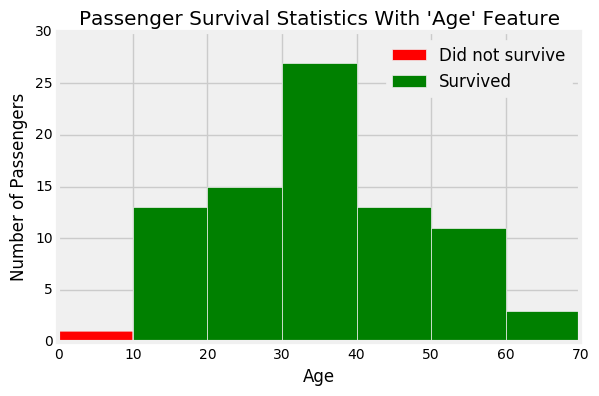

In [15]:
# Graph 3
# Most women in first class survived
survival_stats(data, outcomes, 'Age', ["Sex == 'female'", "Pclass == 1"])

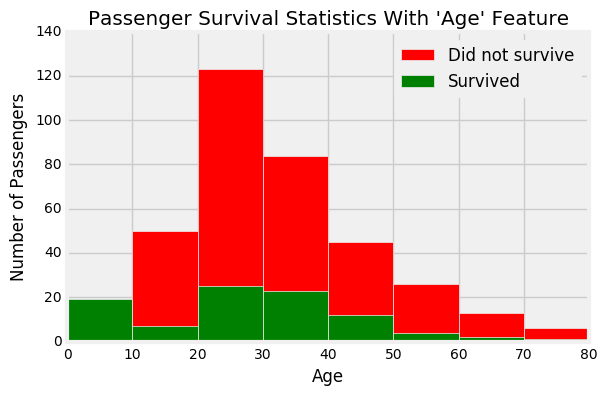

In [16]:
# Graph 4
# Most men die, unless they are 10 years old or less
# We might say that men yougner than 10 years old survived.
survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

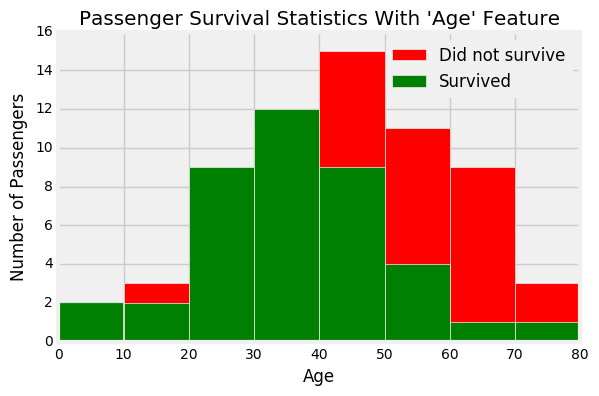

In [17]:
# Graph 5
# Men in first class that are less than 40 years old are more likely to survive. 
# But not always true, we see some red between 10 and 20 years old. 1 person died. 
survival_stats(data, outcomes, 'Age', ["Pclass == 1", "Sex == 'male'"])

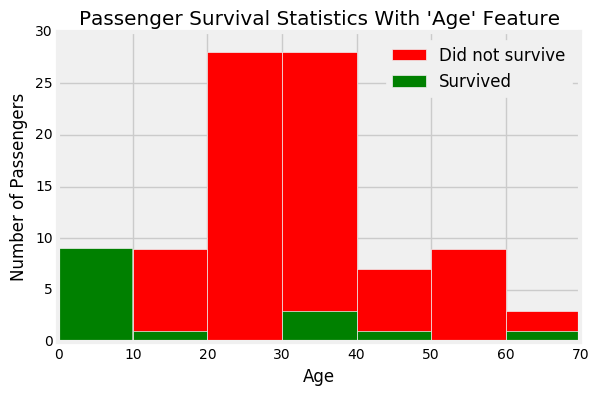

In [18]:
# Graph 6 
survival_stats(data, outcomes, 'Age', ["Pclass == 2", "Sex == 'male'"])

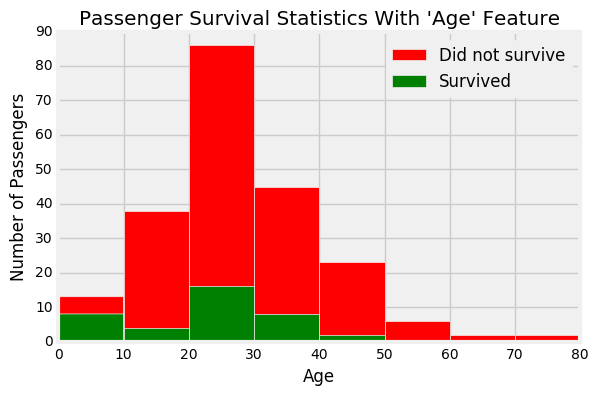

In [19]:
# Graph 7
survival_stats(data, outcomes, 'Age', ["Pclass == 3", "Sex == 'male'"])

In [20]:
def predictions_3(x_data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for _, passenger in x_data.iterrows():
        # Decision Tree based on previous accuracy and knowledge about the data
        # Mix of 'Sex', 'Age' and 'Pclass' data that we saw with previous visualisation.
        if passenger['Sex'] == 'female':
            # Conditions coming from Graph 1
            if passenger['Age'] < 60 and passenger['Age'] > 40 and passenger['Pclass'] == 3:
                predictions.append(0)
            # Condition coming from Graph 2 & 3 
            else:
                predictions.append(1)
        # This part is to predict/decide if a male survived or died. 
        # These conditions are a result from the data visualization exploration just above this code cell.
        else:
            # If the age of the male is less or equal to 10, it's a child, we assume that he survived.
            # Graph 6
            if passenger['Age'] <=10 and passenger['Pclass'] == 2:
                predictions.append(1)
            # Men in first class that are younger than or equal to 40 also had a higher probability to survive.
            # Graph 5
            elif passenger['Pclass'] == 1 and passenger['Age'] <= 40:
                predictions.append(1)
            # If the two previous conditions weren't met, there is a good chance that the men died.
            else:
                predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data) 

### Question 4
*Describe the steps you took to implement the final prediction model so that it got an accuracy of at least 80%. What features did you look at? Were certain features more informative than others? Which conditions did you use to split the survival outcomes in the data? How accurate are your predictions?*  
**Hint:** Run the code cell below to see the accuracy of your predictions.

In [21]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 80.70%.


**Answer**: *Predictions have an accuracy of 80.70%.*

# Conclusion

After several iterations of exploring and conditioning on the data, you have built a useful algorithm for predicting the survival of each passenger aboard the RMS Titanic. The technique applied in this project is a manual implementation of a simple machine learning model, the *decision tree*. A decision tree splits a set of data into smaller and smaller groups (called *nodes*), by one feature at a time. Each time a subset of the data is split, our predictions become more accurate if each of the resulting subgroups are more homogeneous (contain similar labels) than before. The advantage of having a computer do things for us is that it will be more exhaustive and more precise than our manual exploration above. [This link](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/) provides another introduction into machine learning using a decision tree.

A decision tree is just one of many models that come from *supervised learning*. In supervised learning, we attempt to use features of the data to predict or model things with objective outcome labels. That is to say, each of our data points has a known outcome value, such as a categorical, discrete label like `'Survived'`, or a numerical, continuous value like predicting the price of a house.

### Question 5
*Think of a real-world scenario where supervised learning could be applied. What would be the outcome variable that you are trying to predict? Name two features about the data used in this scenario that might be helpful for making the predictions.*  

**Answer**: *Possibly marketing. We could try to predict if a customer bought or not an item online and making a decision tree about their age, sex and personal income.*

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

## Additional Steps: Using The Previous DT Algorithm On Kaggle
In this part, we make the last prediction of this Udacity project competition-ready. We start by getting the test data and than reprocessing it into the last algorithm that had an accuracy of 80.70%. We'll see that this is not a good strategy and we'll explore the data further with different algorithms in order to increase our score.

In [22]:
test = pd.read_csv('test.csv')

In [23]:
predictions_test = pd.Series(np.ones(5, dtype = int))
def predictions_4(test):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions_test = []
    for _, passenger in test.iterrows():
        # Decision Tree based on previous accuracy and knowledge about the data
        # Mix of 'Sex', 'Age' and 'Pclass' data that we saw with previous visualisation.
        if passenger['Sex'] == 'female':
            # Conditions coming from Graph 1
            if passenger['Age'] < 60 and passenger['Age'] > 40 and passenger['Pclass'] == 3:
                predictions_test.append(0)
            # Condition coming from Graph 2 & 3 
            else:
                predictions_test.append(1)
        # This part is to predict/decide if a male survived or died. 
        # These conditions are a result from the data visualization exploration just above this code cell.
        else:
            # If the age of the male is less or equal to 10, it's a child, we assume that he survived.
            # Graph 6
            if passenger['Age'] <=10 and passenger['Pclass'] == 2:
                predictions_test.append(1)
            # Men in first class that are younger than or equal to 40 also had a higher probability to survive.
            # Graph 5
            elif passenger['Pclass'] == 1 and passenger['Age'] <= 40:
                predictions_test.append(1)
            # If the two previous conditions weren't met, there is a good chance that the men died.
            else:
                predictions_test.append(0)
    
    # Return our predictions
    return pd.Series(predictions_test)

# Make the predictions
predictions_test = predictions_4(test)

In [24]:
# What score this algorithm gets on kaggle?
score = pd.DataFrame()
score['PassengerId'] = test['PassengerId']
score['Survived'] = predictions
score[['PassengerId','Survived']].to_csv('udacity_score.csv',index=False)

The score we get on Kaggle is 0.51675. Which is terrible.

## Extra Exploration
The data exploration that we accomplished in Project 0 of the Nanodegree was mostly visual and we didn't bother processing some of the data i.e. NaN values or transforming categorical data to numeric data. We will accomplish some of these steps here. Some data cleaning needs to be done as well, we'll start with that.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [26]:
data = data.append(test)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

In [27]:
data.shape

(1309, 11)

We see a difference in the count for the Age column (891-714) of 177. This means 177 values are unaccounted for. This certainly is not helping the prediction_4 algorithm. We will need to fill these values because 'Age' is an important feature. Because there are so many missing values for 'Age', using the mean or the median of these values, does not seem to be the best path. The good idea might be to infer the age of people with their titles (found in the 'Name' column). 

In [28]:
# For each column processed, we run a short function tell us all went well. 
def status(feature):
    print 'Processed',feature,'column.'

In [29]:
# Extract titles from 'Name' column
def get_titles():
    data['Title'] = data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    # Map of titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"
                        }
    # Map each title
    data['Title'] = data.Title.map(Title_Dictionary)
    status('Title')

In [30]:
get_titles()

Processed Title column.


In [31]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


We see the added Title column.

In [32]:
data.shape

(1309, 12)

In order to process the 'Age' column, we'll need to explore a little bit more about who is who and what is the median age of each person or group. Let's have a look and group by category.

In [33]:
grouped = data.groupby(['Sex','Pclass','Title'])
grouped.median()

PassengerId   Age  SibSp  Parch      Fare
Sex    Pclass Title                                             
female 1      Miss           529.5  30.0    0.0    0.0   99.9625
              Mrs            853.5  45.0    1.0    0.0   78.1125
              Officer        797.0  49.0    0.0    0.0   25.9292
              Royalty        760.0  39.0    0.0    0.0   86.5000
       2      Miss           606.5  20.0    0.0    0.0   20.2500
              Mrs            533.0  30.0    1.0    0.0   26.0000
       3      Miss           603.5  18.0    0.0    0.0    8.0500
              Mrs            668.5  31.0    1.0    1.0   15.5000
male   1      Master         803.0   6.0    1.0    2.0  134.5000
              Mr             634.0  41.5    0.0    0.0   47.1000
              Officer        678.0  52.0    0.0    0.0   37.5500
              Royalty        600.0  40.0    0.0    0.0   27.7208
       2      Master         550.0   2.0    1.0    1.0   26.0000
              Mr             723.5  30.0    0.0    0.0   13.0000
              Officer        513.0  41.5    0.0    0.0   13.0000
       3      Master         789.0   6.0    3.0    1.0   22.3583
              Mr             640.5  26.0    0.0    0.0    7.8958

Now that we have a clearer picture, we will write a function that fill the missing values with the median of the groups we just made. 

In [34]:
def process_age():
    global data
    # a function that fills the missing values of the Age variable
    def fillAges(row):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return 30
            elif row['Title'] == 'Mrs':
                return 45
            elif row['Title'] == 'Officer':
                return 49
            elif row['Title'] == 'Royalty':
                return 39

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return 20
            elif row['Title'] == 'Mrs':
                return 30

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return 18
            elif row['Title'] == 'Mrs':
                return 31

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 41.5
            elif row['Title'] == 'Officer':
                return 52
            elif row['Title'] == 'Royalty':
                return 40

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return 2
            elif row['Title'] == 'Mr':
                return 30
            elif row['Title'] == 'Officer':
                return 41.5

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 26
    
    data.Age = data.apply(lambda r : fillAges(r) if np.isnan(r['Age']) else r['Age'], axis=1)
    
    status('Age')

In [35]:
process_age()

Processed Age column.


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


The Age column is filled, let's turn our attention to the Name column. Now that we have the title, the name does not good for our prediction.

In [37]:
def process_names():
    global data
    # Remove the Name column
    data.drop('Name',axis=1,inplace=True)
    
    # Encode dummy variables
    titles_dummies = pd.get_dummies(data['Title'],prefix='Title')
    data = pd.concat([data,titles_dummies],axis=1)
    
    # Remove the Title column
    data.drop('Title',axis=1,inplace=True)
    
    status('Name')

In [38]:
process_names()

Processed Name column.


The Name column was updated. We see 1 missing value in the Fare column, 2 missing values for the Embarked column and 687 values for the Cabin. We will need to do something about these two columns. But first, let's process the Fare column. 

In [39]:
# Only one value is missing, let's replace the NaN with the mean.
def process_fares():    
    global data
    # Replace NaN with mean of the column
    data.Fare.fillna(data.Fare.mean(),inplace=True)  
    status('Fare')

In [40]:
process_fares()

Processed Fare column.


Let's move on to the Embarked column. We'll use the most common Embarked value to fill the missing values.

In [41]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [42]:
def process_embarked():
    global data
    # Fill NaN with (S), because it is more prevalent 
    data.Embarked.fillna('S',inplace=True)
    
    # Dummy encoding for modeling later on 
    embarked_dummies = pd.get_dummies(data['Embarked'],prefix='Embarked')
    data = pd.concat([data, embarked_dummies],axis=1)
    data.drop('Embarked',axis=1,inplace=True)
    
    status('Embarked')

In [43]:
process_embarked()

Processed Embarked column.


In [44]:
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,female,35.0,1,0,113803,53.1000,C123,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Cabin            295 non-null object
Title_Master     1309 non-null float64
Title_Miss       1309 non-null float64
Title_Mr         1309 non-null float64
Title_Mrs        1309 non-null float64
Title_Officer    1309 non-null float64
Title_Royalty    1309 non-null float64
Embarked_C       1309 non-null float64
Embarked_Q       1309 non-null float64
Embarked_S       1309 non-null float64
dtypes: float64(11), int64(4), object(3)
memory usage: 184.1+ KB


We need to turn our attention to the Cabin column, where the most values are missing. We'll write 'N' for Not Known instead of NaN.

In [46]:
def process_cabin():
    global data
    
    # Replace NaN with N
    data.Cabin.fillna('N',inplace=True)
    
    # Match Cabin value with cabin letter
    data['Cabin'] = data['Cabin'].map(lambda c : c[0])
    
    # Dummy encoding.
    cabin_dummies = pd.get_dummies(data['Cabin'],prefix='Cabin')
    
    data = pd.concat([data,cabin_dummies],axis=1)
    
    data.drop('Cabin',axis=1,inplace=True)
    
    status('Cabin')

In [47]:
process_cabin()

Processed Cabin column.


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 26 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Title_Master     1309 non-null float64
Title_Miss       1309 non-null float64
Title_Mr         1309 non-null float64
Title_Mrs        1309 non-null float64
Title_Officer    1309 non-null float64
Title_Royalty    1309 non-null float64
Embarked_C       1309 non-null float64
Embarked_Q       1309 non-null float64
Embarked_S       1309 non-null float64
Cabin_A          1309 non-null float64
Cabin_B          1309 non-null float64
Cabin_C          1309 non-null float64
Cabin_D          1309 non-null float64
Cabin_E          1309 non-null float64
Cabin_F          1309 non-null float64
Cabin_

Every missing values has been taken care of. Let's prepare the data for modeling. 

In [49]:
# We take a look at the data first
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T
0,1,3,male,22.0,1,0,A/5 21171,7.2500,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,1,female,38.0,1,0,PC 17599,71.2833,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,1,female,35.0,1,0,113803,53.1000,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,3,male,35.0,0,0,373450,8.0500,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
# Function to process the Sex column
def process_sex():
    global data
    # mapping string values to numerical one 
    data['Sex'] = data['Sex'].map({'male':1,'female':0})
    status('Sex')

In [51]:
process_sex()

Processed Sex column.


In [52]:
# Function for the Pclass column
def process_pclass():
    global data
    # Encoding 3 categories:
    pclass_dummies = pd.get_dummies(data['Pclass'],prefix="Pclass")
    # Dummy variables
    data = pd.concat([data,pclass_dummies],axis=1)
    # Remove Pclass column
    data.drop('Pclass',axis=1,inplace=True)
    status('Pclass')

In [53]:
process_pclass()

Processed Pclass column.


In [54]:
# Function to process the Ticket column
def process_ticket():
    
    global data
    # Extract prefix of the ticket, returns 'XXX' if no prefix
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip() , ticket)
        ticket = filter(lambda t : not t.isdigit(), ticket)
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    
    # Dummy variables:
    data['Ticket'] = data['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(data['Ticket'],prefix='Ticket')
    data = pd.concat([data, tickets_dummies],axis=1)
    data.drop('Ticket',inplace=True,axis=1)

    status('Ticket')

In [55]:
process_ticket()

Processed Ticket column.


In [56]:
# To process the family, we need to create that variable from the Parch and SibSp columns
def process_family():
    
    global data
    # New feature : the size of families (including the passenger)
    data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
    
    # Introduce other features based on the family size
    data['Family_of_One'] = data['FamilySize'].map(lambda s : 1 if s == 1 else 0)
    data['SmallFamily'] = data['FamilySize'].map(lambda s : 1 if 2<=s<=4 else 0)
    data['LargeFamily'] = data['FamilySize'].map(lambda s : 1 if 5<=s else 0)
    
    status('Family')

In [57]:
process_family()

Processed Family column.


In [58]:
# Normalize all features
def scale_all_features():
    global data
    features = list(data.columns)
    features.remove('PassengerId')
    data[features] = data[features].apply(lambda x: x/x.max(), axis=0)
    
    print 'Features scaled successfully !'

In [59]:
scale_all_features()

Features scaled successfully !


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 68 columns):
PassengerId       1309 non-null int64
Sex               1309 non-null float64
Age               1309 non-null float64
SibSp             1309 non-null float64
Parch             1309 non-null float64
Fare              1309 non-null float64
Title_Master      1309 non-null float64
Title_Miss        1309 non-null float64
Title_Mr          1309 non-null float64
Title_Mrs         1309 non-null float64
Title_Officer     1309 non-null float64
Title_Royalty     1309 non-null float64
Embarked_C        1309 non-null float64
Embarked_Q        1309 non-null float64
Embarked_S        1309 non-null float64
Cabin_A           1309 non-null float64
Cabin_B           1309 non-null float64
Cabin_C           1309 non-null float64
Cabin_D           1309 non-null float64
Cabin_E           1309 non-null float64
Cabin_F           1309 non-null float64
Cabin_G           1309 non-null float64
Cabin_N        

We are done with feature engineering for now. 

## Modeling For Different Algorithms

We'll try the Random Forest algorithm to start off. We'll import the necessary libraries and make the training and testing sets. 

In [61]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV

To evaluate our model we'll be using 5-fold cross validation with the Accuracy metric.

In [62]:
def compute_score(clf, X, y,scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5,scoring=scoring)
    return np.mean(xval)

We need to make the train, test and targets variable so we can fit models on them. 

In [63]:
def recover_train_test_target():
    global data
    targets = outcomes
    train = data.ix[0:890]
    test = data.ix[891:1309]
    
    return train,test,targets

In [64]:
train,test,targets = recover_train_test_target()

In [65]:
train.shape

(891, 68)

In [66]:
test.shape

(418, 68)

We make copies of the files, in order to use them in a different notebook to test XGBoost.

In [67]:
test_process = pd.DataFrame()
test_process = test
test_process.to_csv('processed_test.csv',index=False)

In [68]:
train_process = pd.DataFrame()
train_process = train
train_process.to_csv('processed_train.csv',index=False)

In [69]:
target_process = pd.DataFrame()
target_process = targets
target_process.to_csv('processed_target.csv',index=False)

### Feature selection
We have 68 features from the feature engineering that we did previously. We'll want to decrease the dimensionality in order to use only useful features. By selecting useful features, we'll speed up the training process.

In [70]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(train, targets)

In [71]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_

In [72]:
features.sort_values(['importance'],ascending=False)

,feature,importance
0,PassengerId,0.128415
8,Title_Mr,0.119789
2,Age,0.117572
5,Fare,0.114140
1,Sex,0.095779
9,Title_Mrs,0.041936
7,Title_Miss,0.039067
26,Pclass_3,0.037948
22,Cabin_N,0.027304
24,Pclass_1,0.024035


In [73]:
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(train)
train_new.shape

(891, 15)

In [74]:
test_new = model.transform(test)
test_new.shape

(418, 15)

## Random Forest

In [75]:
forest = RandomForestClassifier(max_features='sqrt', class_weight={0:0.745,1:0.255})

parameter_grid = {
                 'max_depth' : [4,5,6,7,8],
                 'n_estimators': [200,210,240,250],
                 'criterion': ['gini','entropy'],
                 }

cross_validation = StratifiedKFold(targets, n_folds=5)

grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(train_new, targets)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.814814814815
Best parameters: {'n_estimators': 240, 'criterion': 'gini', 'max_depth': 7}


In [76]:
output = grid_search.predict(test_new).astype(int)
rf_score = pd.DataFrame()
rf_score['PassengerId'] = test['PassengerId']
rf_score['Survived'] = output
rf_score[['PassengerId','Survived']].to_csv('rf_score.csv',index=False)

We get a score of 0.79904 on Kaggle (as of Nov 26 2016), which is a significant improvement from the manual decision tree we made as part of the Udacity project.

## Gradient Boost

Let's try Gradient Boost. Some parameters tuning could be done more in depth. 

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
gradient_boost = GradientBoostingClassifier(max_features='sqrt', random_state=10)

parameter_grid = {
                 'min_samples_leaf' : range(2, 10, 1),
                 'max_depth' : range(2, 7, 1),
                 'n_estimators': [400,500,600]
                 }

cross_validation = StratifiedKFold(targets, n_folds=5)

grid_search = GridSearchCV(gradient_boost,
                           param_grid = parameter_grid,
                           cv=cross_validation)

grid_search.fit(train_new, targets)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.806958473625
Best parameters: {'n_estimators': 400, 'max_depth': 5, 'min_samples_leaf': 2}


In [82]:
output = grid_search.predict(test_new).astype(int)
gb_score = pd.DataFrame()
gb_score['PassengerId'] = test['PassengerId']
gb_score['Survived'] = output
gb_score[['PassengerId','Survived']].to_csv('gb_score.csv',index=False)

This scores 0.76555 as of (Nov 26 2016). (without the random_state)

## Adaboost

In [83]:
from sklearn.ensemble import AdaBoostClassifier

In [84]:
ada_boost = AdaBoostClassifier(random_state=42)

parameter_grid = {
                 'learning_rate' : range(1, 3, 1),
                 'algorithm' : ['SAMME', 'SAMME.R'],
                 'n_estimators': [200,300,400]
                 }

cross_validation = StratifiedKFold(targets, n_folds=5)

grid_search = GridSearchCV(ada_boost,
                           param_grid = parameter_grid,
                           cv=cross_validation)

grid_search.fit(train_new, targets)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.776655443322
Best parameters: {'n_estimators': 300, 'learning_rate': 1, 'algorithm': 'SAMME'}


In [85]:
output = grid_search.predict(test_new).astype(int)
ada_score = pd.DataFrame()
ada_score['PassengerId'] = test['PassengerId']
ada_score['Survived'] = output
ada_score[['PassengerId','Survived']].to_csv('ada_score.csv',index=False)